The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


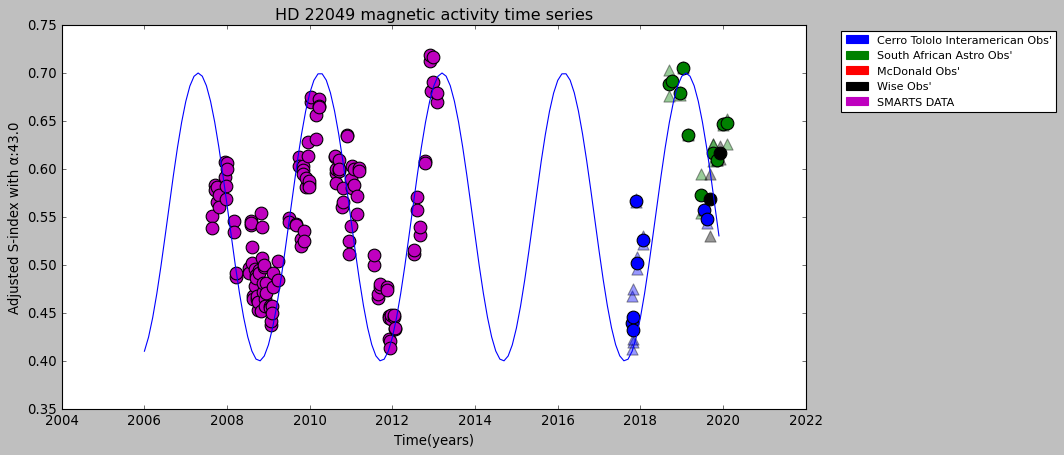

In [7]:
%load_ext autoreload
%autoreload

import pandas as pd

from astropy.time import Time
import pickle as pickle

import helpers as h
import numpy as np
import plotting as plotter
from matplotlib import pyplot as plt

#Project folder directory on your computer
homePath = 'D:/My Documents/Coding Projects/nreshk/'

#required paths for pipeline, try not to change ever
dataPath = homePath + 'data/'
outputPath = homePath + 'output/'
starName = '22049'
starPath = outputPath + starName + '/'
site = 'SMARTS'
cols=['year','adjShk']

h.siteColors.update({site:['m','SMARTS DATA']})#update the site colors with the proper site name

f = open(starPath+starName+'.pkl','rb')
analyzedData = pickle.load(f)


csv_data = pd.read_csv(homePath+site+'/'+starName+'.csv',usecols=cols,dtype={cols[0]:np.float64,cols[1]:np.float64})
csv_data.apply(pd.to_numeric, errors='coerce')

for i in range(len(csv_data-1)):
    year = csv_data['year'][i]
    shk = csv_data[cols[1]][i]

    tmp = h.analyzedData(shk=shk)#make a 'fake' data structure to easily print with
    
    tmp.decimalYr=Time(year,format='decimalyear')
    tmp.site = site
    tmp.average = True
    analyzedData.append(tmp)


fig, ax = plt.subplots(figsize=(12,6))
time = np.arange(2006,2020,.1)
amp = .15*np.sin(2*np.pi/2.95*time-1.2)+.55
plt.plot(time,amp)
plotter.plot_timeseries(analyzedData,[],fig,ax)


In [16]:
%load_ext autoreload
%autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[63 64 65 66 67]
